# AI_14_강병협_Section1 Project

#Part 0. 기획 배경

아래의 feature를 가진 게임타이틀의 판매량 데이터를 바탕으로 다음 분기(2021년 1분기)에 어떤 게임을 설계해야 할까(Goal : 높은 판매량)를 예측하는 프로젝트를 진행해보겠습니다.

* Name
* Platform
* Year
* Genre
* Publisher
* NA_Sales
* EU_Sales
* JP_Sales
* Other_Sales



#Part 1. EDA / Data Wrangling

In [1]:
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import scipy

scipy.__version__

'1.7.3'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/vgames2.csv').drop(columns = 'Unnamed: 0' )

제공된 데이터셋을 불러오고, 핵심 feature 중 하나인 Name에 오류가 없는지 확인하여 줍니다. 

In [5]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df_name_null = df.Name.isnull()
df_name_null 

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Name, Length: 16598, dtype: bool

In [7]:
df_name_dup = df['Name'].duplicated()
dup = df[df_name_dup]
dup = dup.sort_values(by=['Name'])
dup

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6839,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.2
8867,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0,0
16280,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14
9465,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0,0.01
5504,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.3,0.29,0.01M,0.07
...,...,...,...,...,...,...,...,...,...
5297,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0,0.05,0,0.01
5796,pro evolution soccer 2011,PS3,2010.0,Sports,Konami Digital Entertainment,0.29,1.18,0.54,0.41
13757,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.1,0.03,0.02
16251,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11


Name feature에서 결측치와 중복치를 검정한 결과,
</br> 결측치는 없었으며, 중복치는 플랫폼이 달라서 발생하는 것임을 알게되었습니다.




In [8]:
df_year_null = df.Year.isnull()
df_year_null

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Year, Length: 16598, dtype: bool

In [9]:
year = df.sort_values(by=['Year'])
year.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
10315,AeroFighters Assault,N64,97.0,Action,Video System,0.15,0.04,0,0
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
14572,S.C.A.R.S,PS,98.0,Racing,Ubisoft,0.05,0.03,0,0.01
3492,Glover,N64,98.0,Platform,Hasbro Interactive,0.72,0.17,0,0.01


In [10]:
# 연도에 2자리로 되어있는 값들을 정정
for i in range(len(df.Year)) :
    k = df.iloc[i,2]
    if 20 < k < 1000 :
        df.iloc[i,2] += 1900
    elif k <20 :
        df.iloc[i,2] += 2000


In [11]:
# year = df.sort_values(by=['Year'])
# genre = df.sort_values(by=['Genre'])
# publisher = df.sort_values(by=['Publisher'])

# missing = df[df.Year.isnull()|df.Genre.isnull()|df.Publisher.isnull()]

# missing

# for i, y in enumerate(missing.Year) :
#     if math.isnan(y) :
#         missing.iloc[i,2] = year.query('Name == missing.iloc[i,0]')


# missing

In [12]:
df.fillna({'Publisher':'unknown'},inplace = True)
df.dropna(subset=['Year','Genre'], inplace = True)
df = df.astype({'Year':'int'})

df.isnull().sum()


Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [13]:
# 지역별Sales feature에서 K, M값을 숫자값으로 변환 

sale = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in sale : 
  df[i] = df[i].replace({"K":"*0.001", "M":"*1"}, regex=True).map(pd.eval) 

In [14]:
df.groupby('Platform').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,
2600,227948,80.32,4.83,0.00,0.83
3DO,5984,0.00,0.00,0.10,0.00
3DS,1004518,72.86,54.25,92.96,11.76
DC,103997,5.43,1.69,8.56,0.27
DS,4275461,387.96,194.07,174.97,60.24
GB,193608,113.64,47.51,85.12,8.16
GBA,1620601,183.95,74.53,46.56,7.61
GC,1083840,131.74,38.27,20.90,5.11
GEN,53812,19.27,5.52,2.67,0.89


In [15]:
# 게임기 제조사별로 Platform 통일

df['Platform'] = df['Platform'].replace('DS', 'NINTENDO').replace('Wii', 'NINTENDO').replace('GBA', 'NINTENDO').replace('GC', 'NINTENDO').replace('3DS', 'NINTENDO').replace('GB', 'NINTENDO').replace('NES', 'NINTENDO').replace('N64', 'NINTENDO').replace('SNES', 'NINTENDO').replace('WiiU', 'NINTENDO')
df['Platform'] = df['Platform'].replace('PSP', 'PLAYSTATION').replace('PS3', 'PLAYSTATION').replace('PS', 'PLAYSTATION').replace('PS4', 'PLAYSTATION').replace('PS2', 'PLAYSTATION').replace('PSV', 'PLAYSTATION')
df['Platform'] = df['Platform'].replace('XB', 'XBOX').replace('X360', 'XBOX').replace('XOne', 'XBOX')
df['Platform'] = df['Platform'].replace('2600', 'ATARI')
df['Platform'] = df['Platform'].replace('SAT', 'SEGA').replace('DC', 'SEGA').replace('GEN', 'SEGA').replace('SCD', 'SEGA').replace('GG', 'SEGA')
df['Platform'] = df['Platform'].replace('WS', 'BANDAI')
df['Platform'] = df['Platform'].replace('NG', 'SNK')
df['Platform'] = df['Platform'].replace('TG16', 'NEC').replace('PCFX', 'NEC')

df.groupby('Platform').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,
3DO,5984,0.00,0.00,0.10,0.00
ATARI,227948,80.32,4.83,0.00,0.83
BANDAI,12000,0.00,0.00,1.42,0.00
NEC,5986,0.00,0.00,0.19,0.00
NINTENDO,12342294,1749.08,774.50,747.76,190.62
PC,1888248,92.09,136.80,0.17,24.24
PLAYSTATION,13130607,1508.70,1089.85,462.35,461.65
SEGA,517077,26.42,8.11,43.98,1.28
SNK,23934,0.00,0.00,1.44,0.00


##Q1. 지역에 따라 선호하는 게임 장르가 다를까?


In [16]:
df_g = df.groupby('Genre').sum()
df_g 

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,6509645,858.78,513.64,156.61,183.99
Adventure,2550324,101.92,63.71,51.89,16.70
Fighting,1673860,220.35,99.90,87.14,36.15
Misc,3422377,400.29,210.20,104.18,72.74
Platform,1751333,445.38,200.65,130.53,51.45
Puzzle,1136973,121.58,50.48,56.24,12.44
Racing,2445913,354.70,235.03,56.32,76.51
Role-Playing,2942353,318.76,183.10,342.93,56.73
Shooter,2567579,574.48,310.23,38.18,101.86


,Genre,NA_Sales
0,Action,858.78
1,Sports,667.26
2,Shooter,574.48
3,Platform,445.38
4,Misc,400.29
5,Racing,354.70
6,Role-Playing,318.76
7,Fighting,220.35
8,Simulation,181.43
9,Puzzle,121.58


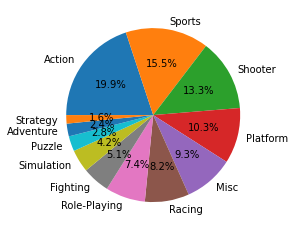

In [17]:
df_g_NA= df_g[['NA_Sales']].sort_values(by='NA_Sales', ascending=False).reset_index(drop= False)
NA_ratio = df_g_NA.NA_Sales
NA_label = df_g_NA.Genre

NA_pie = plt.pie(NA_ratio, labels= NA_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_g_NA

In [45]:
df_NA10_game = df.query("(Year > 2010) and (Year <= 2020)").sort_values(by='NA_Sales', ascending=False).drop(columns = ['EU_Sales','JP_Sales','Other_Sales'])
df_NA10_game.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales
10913,Grand Theft Auto V,XBOX,2013,Action,Take-Two Interactive,9.63
2809,Call of Duty: Modern Warfare 3,XBOX,2011,Shooter,Activision,9.03
6393,Call of Duty: Black Ops II,XBOX,2012,Shooter,Activision,8.25
3483,Grand Theft Auto V,PLAYSTATION,2013,Action,Take-Two Interactive,7.01
5604,Call of Duty: Ghosts,XBOX,2013,Shooter,Activision,6.72
14576,Halo 4,XBOX,2012,Shooter,Microsoft Game Studios,6.63
223,Just Dance 3,NINTENDO,2011,Misc,Ubisoft,6.05
9070,Call of Duty: Black Ops 3,PLAYSTATION,2015,Shooter,Activision,5.77
9994,Minecraft,XBOX,2013,Misc,Microsoft Game Studios,5.58
14120,Call of Duty: Modern Warfare 3,PLAYSTATION,2011,Shooter,Activision,5.54


,Genre,EU_Sales
0,Action,513.64
1,Sports,370.97
2,Shooter,310.23
3,Racing,235.03
4,Misc,210.20
5,Platform,200.65
6,Role-Playing,183.10
7,Simulation,113.17
8,Fighting,99.90
9,Adventure,63.71


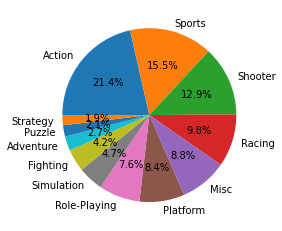

In [19]:
df_g_EU= df_g[['EU_Sales']].sort_values(by='EU_Sales', ascending=False).reset_index(drop= False)
EU_ratio = df_g_EU.EU_Sales
EU_label = df_g_EU.Genre

EU_pie = plt.pie(EU_ratio, labels= EU_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_g_EU

In [46]:
df_EU10_game = df.query("(Year > 2010) and (Year <= 2020)").sort_values(by='EU_Sales', ascending=False).drop(columns = ['NA_Sales','JP_Sales','Other_Sales'])
df_EU10_game.head(10)

,Name,Platform,Year,Genre,Publisher,EU_Sales
3483,Grand Theft Auto V,PLAYSTATION,2013,Action,Take-Two Interactive,9.27
2639,FIFA 16,PLAYSTATION,2015,Sports,Electronic Arts,6.06
4240,Call of Duty: Black Ops II,PLAYSTATION,2012,Shooter,Activision,5.88
14120,Call of Duty: Modern Warfare 3,PLAYSTATION,2011,Shooter,Activision,5.82
2008,Grand Theft Auto V,PLAYSTATION,2014,Action,Take-Two Interactive,5.81
9070,Call of Duty: Black Ops 3,PLAYSTATION,2015,Shooter,Activision,5.81
10913,Grand Theft Auto V,XBOX,2013,Action,Take-Two Interactive,5.31
9035,FIFA Soccer 13,PLAYSTATION,2012,Action,Electronic Arts,5.05
2723,FIFA 14,PLAYSTATION,2013,Sports,Electronic Arts,4.32
13489,FIFA 12,PLAYSTATION,2011,Sports,Electronic Arts,4.32


,Genre,JP_Sales
0,Role-Playing,342.93
1,Action,156.61
2,Sports,134.76
3,Platform,130.53
4,Misc,104.18
5,Fighting,87.14
6,Simulation,63.54
7,Racing,56.32
8,Puzzle,56.24
9,Adventure,51.89


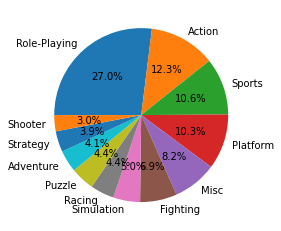

In [20]:
df_g_JP= df_g[['JP_Sales']].sort_values(by='JP_Sales', ascending=False).reset_index(drop= False)
JP_ratio = df_g_JP.JP_Sales
JP_label = df_g_JP.Genre

JP_pie = plt.pie(JP_ratio, labels= JP_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_g_JP

In [52]:
df_JP10_game = df.query("(Year > 2010) and (Year <= 2020)").sort_values(by='JP_Sales', ascending=False).drop(columns = ['NA_Sales','EU_Sales','Other_Sales'])
df_JP10_game.head(10)

,Name,Platform,Year,Genre,Publisher,JP_Sales
8906,Animal Crossing: New Leaf,NINTENDO,2012,Simulation,Nintendo,4.36
15674,Monster Hunter 4,NINTENDO,2013,Role-Playing,Capcom,3.44
12966,Yokai Watch 2 Ganso/Honke,NINTENDO,2014,Role-Playing,Nintendo,3.18
15678,Pokemon Black 2/Pokemon White 2,NINTENDO,2012,Role-Playing,Nintendo,3.14
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,NINTENDO,2014,Role-Playing,Nintendo,3.08
10892,Monster Hunter X,NINTENDO,2015,Action,Capcom,2.78
5147,Yokai Watch 2 Shinuchi,NINTENDO,2014,Role-Playing,Level 5,2.68
11123,Mario Kart 7,NINTENDO,2011,Racing,Nintendo,2.67
537,Monster Hunter 4 Ultimate,NINTENDO,2014,Role-Playing,Nintendo,2.62
10379,New Super Mario Bros. 2,NINTENDO,2012,Platform,Nintendo,2.47


,Genre,Other_Sales
0,Action,183.99
1,Sports,132.35
2,Shooter,101.86
3,Racing,76.51
4,Misc,72.74
5,Role-Playing,56.73
6,Platform,51.45
7,Fighting,36.15
8,Simulation,31.32
9,Adventure,16.70


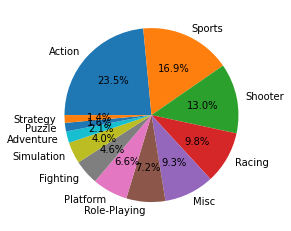

In [21]:
df_g_Ot= df_g[['Other_Sales']].sort_values(by='Other_Sales', ascending=False).reset_index(drop= False)
Ot_ratio = df_g_Ot.Other_Sales
Ot_label = df_g_Ot.Genre

Ot_pie = plt.pie(Ot_ratio, labels= Ot_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_g_Ot

In [53]:
df_Ot10_game = df.query("(Year > 2010) and (Year <= 2020)").sort_values(by='Other_Sales', ascending=False).drop(columns = ['NA_Sales','EU_Sales','JP_Sales'])
df_Ot10_game.head(10)

,Name,Platform,Year,Genre,Publisher,Other_Sales
3483,Grand Theft Auto V,PLAYSTATION,2013,Action,Take-Two Interactive,4.14
4240,Call of Duty: Black Ops II,PLAYSTATION,2012,Shooter,Activision,2.52
9070,Call of Duty: Black Ops 3,PLAYSTATION,2015,Shooter,Activision,2.31
2008,Grand Theft Auto V,PLAYSTATION,2014,Action,Take-Two Interactive,2.02
9035,FIFA Soccer 13,PLAYSTATION,2012,Action,Electronic Arts,2.01
2723,FIFA 14,PLAYSTATION,2013,Sports,Electronic Arts,1.73
14120,Call of Duty: Modern Warfare 3,PLAYSTATION,2011,Shooter,Activision,1.62
3079,FIFA 15,PLAYSTATION,2014,Sports,Electronic Arts,1.47
13489,FIFA 12,PLAYSTATION,2011,Sports,Electronic Arts,1.42
10913,Grand Theft Auto V,XBOX,2013,Action,Take-Two Interactive,1.38


##Q2. 연도별 게임의 트렌드가 있을까?

In [22]:
df_Y = df.eval('All_Sales = NA_Sales+EU_Sales+JP_Sales+Other_Sales').drop(columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
df_Y 

,Name,Platform,Year,Genre,Publisher,All_Sales
0,Candace Kane's Candy Factory,NINTENDO,2008,Action,Destineer,0.04
1,The Munchables,NINTENDO,2009,Action,Namco Bandai Games,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PLAYSTATION,2010,Adventure,Alchemist,0.02
3,Deal or No Deal: Special Edition,NINTENDO,2010,Misc,Zoo Games,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PLAYSTATION,2010,Platform,D3Publisher,0.25
...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,NINTENDO,2006,Platform,Vivendi Games,0.20
16594,Rainbow Islands: Revolution,PLAYSTATION,2005,Action,Rising Star Games,0.01
16595,NBA 2K16,PLAYSTATION,2015,Sports,Take-Two Interactive,0.79
16596,Toukiden: The Age of Demons,PLAYSTATION,2013,Action,Tecmo Koei,0.38


In [23]:
import plotly.express as px

df_Y=df_Y.sort_values(by=['Year','Genre']).reset_index(drop= False)
px.bar(data_frame=df_Y, x='Genre', y='All_Sales', animation_frame='Year')


,Genre,All_Sales
0,Action,1713.02
1,Sports,1305.34
2,Shooter,1024.75
3,Role-Playing,901.52
4,Platform,828.01
5,Misc,787.41
6,Racing,722.56
7,Fighting,443.54
8,Simulation,389.46
9,Puzzle,240.74


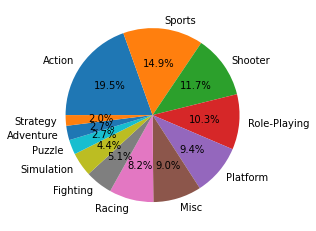

In [24]:
# 누적판매량
df_Y_G = df_Y.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G_ratio = df_Y_G.All_Sales
df_Y_G_label = df_Y_G.Genre

df_Y_G_pie = plt.pie(df_Y_G_ratio, labels= df_Y_G_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G

In [54]:
df_Y_game = df_Y.sort_values(by='All_Sales', ascending=False)
df_Y_game.head(10).drop(columns=['index'])

,Name,Platform,Year,Genre,Publisher,All_Sales
6943,Wii Sports,NINTENDO,2006,Sports,Nintendo,82.74
126,Super Mario Bros.,NINTENDO,1985,Platform,Nintendo,40.24
9142,Mario Kart Wii,NINTENDO,2008,Racing,Nintendo,35.83
10932,Wii Sports Resort,NINTENDO,2009,Sports,Nintendo,33.00
848,Pokemon Red/Pokemon Blue,NINTENDO,1996,Role-Playing,Nintendo,31.38
193,Tetris,NINTENDO,1989,Puzzle,Nintendo,30.26
6534,New Super Mario Bros.,NINTENDO,2006,Platform,Nintendo,30.01
6424,Wii Play,NINTENDO,2006,Misc,Nintendo,29.01
10417,New Super Mario Bros. Wii,NINTENDO,2009,Platform,Nintendo,28.61
116,Duck Hunt,NINTENDO,1984,Shooter,Nintendo,28.31


In [26]:
df_Y_G80 = df_Y.query("Year <= 1990")
df_Y_G90 = df_Y.query("(Year > 1990) and (Year <= 2000)")
df_Y_G00 = df_Y.query("(Year > 2000) and (Year <= 2010)")
df_Y_G10 = df_Y.query("(Year > 2010) and (Year <= 2020)")

,Genre,All_Sales
0,Platform,145.24
1,Puzzle,68.74
2,Shooter,59.77
3,Action,57.49
4,Sports,33.89
5,Role-Playing,19.77
6,Racing,18.35
7,Misc,8.44
8,Fighting,7.24
9,Adventure,4.78


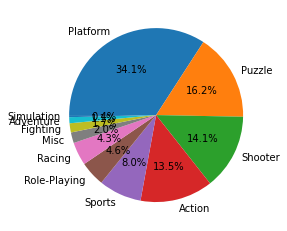

In [27]:
df_Y_G80a = df_Y_G80.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G80_ratio = df_Y_G80a.All_Sales
df_Y_G80_label = df_Y_G80a.Genre

df_Y_G80_pie = plt.pie(df_Y_G80_ratio, labels= df_Y_G80_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G80a

In [28]:
df_Y_G80_game = df_Y_G80.sort_values(by='All_Sales', ascending=False)
df_Y_G80_game.head().drop(columns=['index'])

,Name,Platform,Year,Genre,Publisher,All_Sales
126,Super Mario Bros.,NINTENDO,1985,Platform,Nintendo,40.24
193,Tetris,NINTENDO,1989,Puzzle,Nintendo,30.26
116,Duck Hunt,NINTENDO,1984,Shooter,Nintendo,28.31
209,Super Mario World,NINTENDO,1990,Platform,Nintendo,20.62
191,Super Mario Land,NINTENDO,1989,Platform,Nintendo,18.14


,Genre,All_Sales
0,Role-Playing,207.29
1,Platform,201.94
2,Sports,185.60
3,Action,166.65
4,Racing,162.56
5,Fighting,143.77
6,Misc,78.98
7,Shooter,75.72
8,Strategy,66.03
9,Simulation,54.28


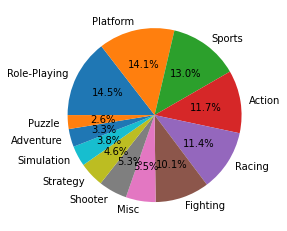

In [29]:
df_Y_G90a = df_Y_G90.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G90_ratio = df_Y_G90a.All_Sales
df_Y_G90_label = df_Y_G90a.Genre

df_Y_G90_pie = plt.pie(df_Y_G90_ratio, labels= df_Y_G90_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G90a

In [30]:
df_Y_G90_game = df_Y_G90.sort_values(by='All_Sales', ascending=False)
df_Y_G90_game.head().drop(columns=['index'])

,Name,Platform,Year,Genre,Publisher,All_Sales
848,Pokemon Red/Pokemon Blue,NINTENDO,1996,Role-Playing,Nintendo,31.38
1834,Pokemon Gold/Pokemon Silver,NINTENDO,1999,Role-Playing,Nintendo,23.09
1483,Pokémon Yellow: Special Pikachu Edition,NINTENDO,1998,Role-Playing,Nintendo,14.64
800,Super Mario 64,NINTENDO,1996,Platform,Nintendo,11.90
263,Super Mario Land 2: 6 Golden Coins,NINTENDO,1992,Adventure,Nintendo,11.18


,Genre,All_Sales
0,Action,936.74
1,Sports,853.59
2,Misc,559.09
3,Shooter,504.06
4,Role-Playing,453.72
5,Racing,452.93
6,Platform,392.06
7,Simulation,284.33
8,Fighting,225.88
9,Adventure,137.38


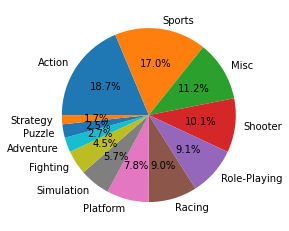

In [31]:
df_Y_G00a = df_Y_G00.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G00_ratio = df_Y_G00a.All_Sales
df_Y_G00_label = df_Y_G00a.Genre

df_Y_G00_pie = plt.pie(df_Y_G00_ratio, labels= df_Y_G00_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G00a

In [32]:
df_Y_G00_game = df_Y_G00.sort_values(by='All_Sales', ascending=False)
df_Y_G00_game.head(10).drop(columns=['index'])

,Name,Platform,Year,Genre,Publisher,All_Sales
6943,Wii Sports,NINTENDO,2006,Sports,Nintendo,82.74
9142,Mario Kart Wii,NINTENDO,2008,Racing,Nintendo,35.83
10932,Wii Sports Resort,NINTENDO,2009,Sports,Nintendo,33.00
6534,New Super Mario Bros.,NINTENDO,2006,Platform,Nintendo,30.01
6424,Wii Play,NINTENDO,2006,Misc,Nintendo,29.01
10417,New Super Mario Bros. Wii,NINTENDO,2009,Platform,Nintendo,28.61
5923,Nintendogs,NINTENDO,2005,Simulation,Nintendo,24.75
5712,Mario Kart DS,NINTENDO,2005,Racing,Nintendo,23.43
8097,Wii Fit,NINTENDO,2007,Sports,Nintendo,22.72
11015,Wii Fit Plus,NINTENDO,2009,Sports,Nintendo,22.00


,Genre,All_Sales
0,Action,552.14
1,Shooter,385.20
2,Sports,232.26
3,Role-Playing,220.74
4,Misc,140.90
5,Platform,88.77
6,Racing,88.72
7,Fighting,66.65
8,Simulation,49.21
9,Adventure,44.30


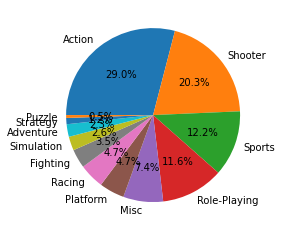

In [33]:
df_Y_G10a = df_Y_G10.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G10_ratio = df_Y_G10a.All_Sales
df_Y_G10_label = df_Y_G10a.Genre

df_Y_G10_pie = plt.pie(df_Y_G10_ratio, labels= df_Y_G10_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G10a

In [34]:
df_Y_G10_game = df_Y_G10.sort_values(by='All_Sales', ascending=False)
df_Y_G10_game.head(10).drop(columns=['index'])

,Name,Platform,Year,Genre,Publisher,All_Sales
14229,Grand Theft Auto V,PLAYSTATION,2013,Action,Take-Two Interactive,21.39
14296,Grand Theft Auto V,XBOX,2013,Action,Take-Two Interactive,16.38
13231,Call of Duty: Modern Warfare 3,XBOX,2011,Shooter,Activision,14.76
15817,Call of Duty: Black Ops 3,PLAYSTATION,2015,Shooter,Activision,14.24
14072,Call of Duty: Black Ops II,PLAYSTATION,2012,Shooter,Activision,14.04
14077,Call of Duty: Black Ops II,XBOX,2012,Shooter,Activision,13.74
13297,Call of Duty: Modern Warfare 3,PLAYSTATION,2011,Shooter,Activision,13.47
13100,Mario Kart 7,NINTENDO,2011,Racing,Nintendo,12.21
14758,Grand Theft Auto V,PLAYSTATION,2014,Action,Take-Two Interactive,11.99
15125,Pokemon Omega Ruby/Pokemon Alpha Sapphire,NINTENDO,2014,Role-Playing,Nintendo,11.33


##Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스



In [68]:
df_Y_00 = df_Y.query("(Year > 2000)").sort_values(by='All_Sales', ascending=False, ).reset_index(drop= True).head(1000)

df_Y_00.head(20)

,index,Name,Platform,Year,Genre,Publisher,All_Sales
0,2908,Wii Sports,NINTENDO,2006,Sports,Nintendo,82.74
1,12579,Mario Kart Wii,NINTENDO,2008,Racing,Nintendo,35.83
2,3352,Wii Sports Resort,NINTENDO,2009,Sports,Nintendo,33.00
3,6937,New Super Mario Bros.,NINTENDO,2006,Platform,Nintendo,30.01
4,3014,Wii Play,NINTENDO,2006,Misc,Nintendo,29.01
5,16531,New Super Mario Bros. Wii,NINTENDO,2009,Platform,Nintendo,28.61
6,11137,Nintendogs,NINTENDO,2005,Simulation,Nintendo,24.75
7,10650,Mario Kart DS,NINTENDO,2005,Racing,Nintendo,23.43
8,3435,Wii Fit,NINTENDO,2007,Sports,Nintendo,22.72
9,10899,Wii Fit Plus,NINTENDO,2009,Sports,Nintendo,22.00


In [69]:
GTA_sales = df_Y_00 [df_Y_00['Name'].str.contains("Grand")].sum()
Callof_sales = df_Y_00 [df_Y_00['Name'].str.contains("Call of")].sum()
FIFA_sales = df_Y_00 [df_Y_00['Name'].str.contains("FIFA")].sum()
Pokemon_sales = df_Y_00 [df_Y_00['Name'].str.contains("Pokemon")].sum()
Mario_sales = df_Y_00 [df_Y_00['Name'].str.contains("Super Mario")].sum()


print(GTA_sales)
print(Callof_sales)
print(FIFA_sales)
print(Pokemon_sales)
print(Mario_sales)

index                                                   119253
Name         Grand Theft Auto VGrand Theft Auto: San Andrea...
Platform     PLAYSTATIONPLAYSTATIONXBOXPLAYSTATIONPLAYSTATI...
Year                                                     30105
Genre        ActionActionActionActionActionActionActionActi...
Publisher    Take-Two InteractiveTake-Two InteractiveTake-T...
All_Sales                                               149.03
dtype: object
index                                                   323742
Name         Call of Duty: Modern Warfare 3Call of Duty: Bl...
Platform     XBOXXBOXPLAYSTATIONPLAYSTATIONXBOXXBOXPLAYSTAT...
Year                                                     70370
Genre        ShooterShooterShooterShooterShooterShooterShoo...
Publisher    ActivisionActivisionActivisionActivisionActivi...
All_Sales                                               230.71
dtype: object
index                                                   293288
Name         FIFA 16FIFA So

,Genre,All_Sales
0,Action,726.80
1,Shooter,586.19
2,Sports,569.90
3,Role-Playing,383.11
4,Misc,351.18
5,Platform,291.33
6,Racing,276.55
7,Simulation,165.39
8,Fighting,127.39
9,Puzzle,63.57


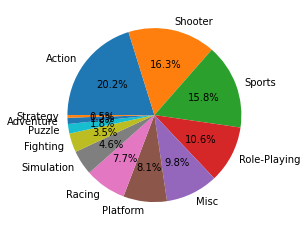

In [36]:
df_Y_00a = df_Y_00.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_00_ratio = df_Y_00a.All_Sales
df_Y_00_label = df_Y_00a.Genre

df_Y_00_pie = plt.pie(df_Y_00_ratio, labels= df_Y_00_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_00a

,Platform,All_Sales
0,PLAYSTATION,1445.80
1,NINTENDO,1350.50
2,XBOX,727.35
3,PC,77.00


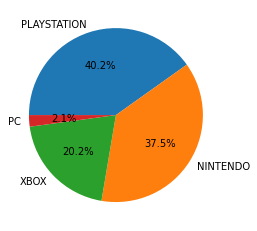

In [37]:
df_p = df_Y_00.groupby('Platform').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_p_ratio = df_p.All_Sales
df_p_label = df_p.Platform

df_p_pie = plt.pie(df_p_ratio, labels= df_p_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_p

##Q4. 어떤 게임을 개발해야 할까? (2010년 이후 데이터를 바탕으로) 

,Platform,All_Sales
0,PLAYSTATION,823.77
1,XBOX,526.28
2,NINTENDO,455.42
3,PC,95.45


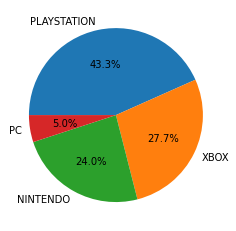

In [38]:
df_Y_G10b = df_Y_G10.groupby('Platform').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G10_ratio = df_Y_G10b.All_Sales
df_Y_G10_label = df_Y_G10b.Platform

df_Y_G10_pie = plt.pie(df_Y_G10_ratio, labels= df_Y_G10_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G10b

,Genre,All_Sales
0,Action,552.14
1,Shooter,385.20
2,Sports,232.26
3,Role-Playing,220.74
4,Misc,140.90
5,Platform,88.77
6,Racing,88.72
7,Fighting,66.65
8,Simulation,49.21
9,Adventure,44.30


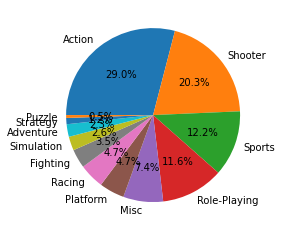

In [39]:
df_Y_G10a = df_Y_G10.groupby('Genre').sum().sort_values(by='All_Sales', ascending=False).drop(columns=['index','Year']).reset_index(drop= False)
df_Y_G10_ratio = df_Y_G10a.All_Sales
df_Y_G10_label = df_Y_G10a.Genre

df_Y_G10_pie = plt.pie(df_Y_G10_ratio, labels= df_Y_G10_label, autopct='%.1f%%', startangle=180, counterclock=False)
df_Y_G10a

In [40]:
df_Y_G10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 12401 to 16276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      3876 non-null   int64  
 1   Name       3876 non-null   object 
 2   Platform   3876 non-null   object 
 3   Year       3876 non-null   int64  
 4   Genre      3876 non-null   object 
 5   Publisher  3876 non-null   object 
 6   All_Sales  3876 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 242.2+ KB


In [75]:
act_10 = df_Y_G10 [df_Y_G10['Genre'].str.contains("Action")]
sho_10 = df_Y_G10 [df_Y_G10['Genre'].str.contains("Shooter")]
spo_10 = df_Y_G10 [df_Y_G10['Genre'].str.contains("Sports")]

act = np.random.choice(act_10['All_Sales'], size=20, replace=True)
sho = np.random.choice(sho_10['All_Sales'], size=20, replace=True)
spo = np.random.choice(spo_10['All_Sales'], size=20, replace=True)

pv1=scipy.stats.ttest_ind(act, sho, alternative='greater').pvalue.round(3)
pv2=scipy.stats.ttest_ind(sho, spo, alternative='greater').pvalue.round(3)
pv3=scipy.stats.ttest_ind(act, spo, alternative='greater').pvalue.round(3)

print(pv1)
print(pv2)
print(pv3)

0.395
0.528
0.417
